#Mengenal Time Series Analysis
Time Series Analysis adalah cara khusus untuk menganalisis urutan titik data (data point) yang dikumpulkan selama interval waktu tertentu. Data dicatat atau direkam pada interval yang konsisten selama periode waktu tertentu. Selain itu, analisis ini juga menunjukkan bagaimana variabel berubah dari waktu ke waktu.

Time Series Analysis dapat membantu memprediksi data kedepannya berdasarkan data sebelumnya (historical data). Dengan begitu, Time Series Analysis dapat membantu untuk memahami penyebab yang mendasari tren atau pola sistemik dari waktu ke waktu.

Dengan menggunakan visualisasi data, pengguna bisnis dapat melihat tren musiman dan menggali lebih dalam mengapa tren ini terjadi.

Salah satu algoritma penerapan dari Time Series Analysis, merupakan model Autoregressive (AR). Model AR memprediksi perilaku masa depan berdasarkan perilaku masa lalu.

Model ini bisa digunakan ketika ada beberapa korelasi antara nilai dalam deret waktu dan nilai yang mendahului dan menggantikannya. Intinya, model AR menggunakan hasil pengamatan yang baru saja dilakukan untuk memprediksi nilai masa depan.

Model lain yang dapat digunakan adalah Moving Average (MA). MA pada dasarnya menyatakan bahwa pengamatan berikutnya adalah rata - rata dari setiap pengamatan sebelumnya.

Dari AR dan MA, kita mengenal ARIMA (Autoregressive Integrated Moving Average). Model ARIMA menggunakan nilai masa lalu dan sekarang dari variabel dependen untuk menghasilkan peramalan jangka pendek yang akurat.

Membaca Dataset

In [21]:
#Mengimpor library pandas
import pandas as pd
pd.set_option('display.max_column', 20)

#Membaca file
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

#Menampilkan isi data
print(dataset_retail)

           no  Row_Num  Customer_ID Product  First_Transaction  \
0           1        1        29531   Jaket      1466304274396   
1           2        2        29531  Sepatu      1406077331494   
2           3        3       141526     Tas      1493349147000   
3           4        4       141526   Jaket      1493362372547   
4           5        5        37545  Sepatu      1429178498531   
...       ...      ...          ...     ...                ...   
99995   99996    99996        56249   Jaket      1464780939092   
99996   99997    99997        56249  Sepatu      1486619170763   
99997   99998    99998        34157   Jaket      1440924860706   
99998   99999    99999        34157  Sepatu      1415932948026   
99999  100000   100000       188822   Jaket      1540373764125   

       Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0         1538718482608                     1467681                 22  
1         1545735761270                     1269337          

Melihat Detail dari Dataset

In [22]:
#Melihat detail tipe data
dataset_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


Mengubah Format Tanggal

In [23]:
#Mengimpor library datetime
import datetime

#Mengubah kolom first_Transaction dan Last_Transaction ke bentuk Datetime
dataset_retail['first_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['First_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail['Last_Transaction']= pd.to_datetime(pd.to_datetime(dataset_retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')).dt.date
dataset_retail.sort_values('First_Transaction', inplace=True)

#Menampilkan isi data
print(dataset_retail)

          no  Row_Num  Customer_ID Product  First_Transaction  \
29588  29589    29589          666  Sepatu      1362729226297   
46452  46453    46453          680  Sepatu      1362977312304   
68535  68536    68536          699  Sepatu      1363238414506   
9205    9206     9206          780  Sepatu      1364275079983   
56435  56436    56436          796  Sepatu      1364375458878   
...      ...      ...          ...     ...                ...   
61131  61132    61132       846213     Tas      1549057391000   
78364  78365    78365        28793     Tas      1549059571000   
31658  31659    31659       193495   Jaket      1549059793975   
80973  80974    80974       111431    Baju      1549060912000   
70566  70567    70567       510574  Sepatu      1549061052811   

      Last_Transaction  Average_Transaction_Amount  Count_Transaction  \
29588       2013-03-08                     8892083                  1   
46452       2013-03-11                     3142403                  1   


Melihat Pola Transaksi dari Waktu ke Waktu

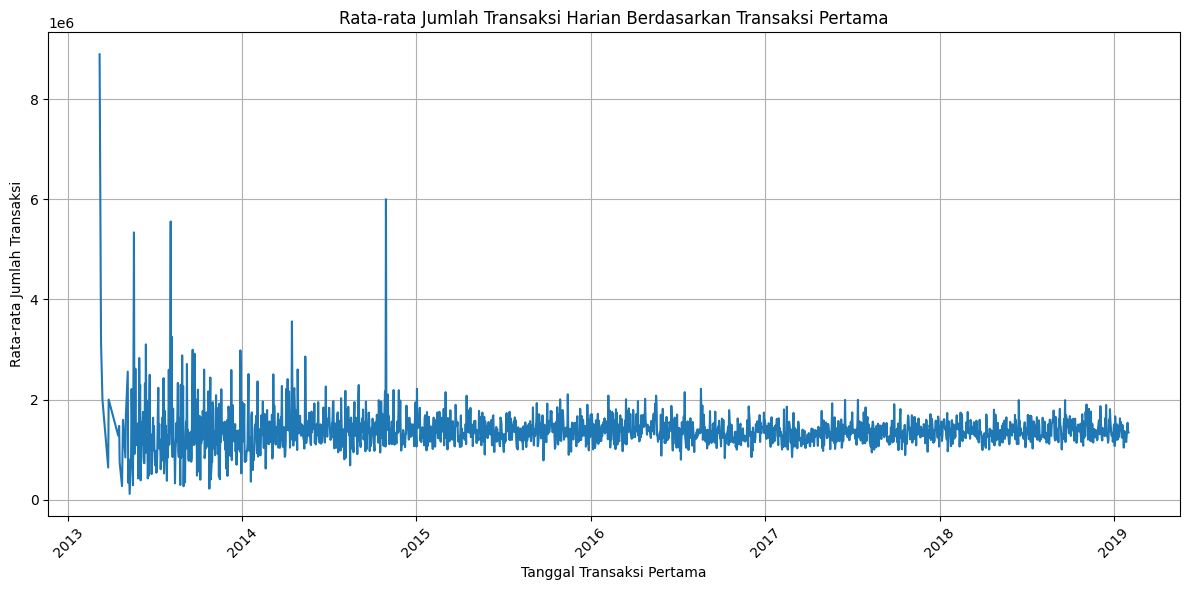

In [30]:
#Mengimport library matplotlib
import matplotlib.pyplot as plt
# Kita akan buat agregasi rata-rata jumlah transaksi harian berdasarkan kolom First_Transaction
# Asumsi: Average_Transaction_Amount adalah kolom numerik yang ingin dirata-ratakan per 'First_Transaction'
daily_avg_trx = dataset_retail.groupby('First_Transaction')['Average_Transaction_Amount'].mean().reset_index()

# Menampilkan nilai rata-rata jumlah transaksi dalam bentuk grafik
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_trx['First_Transaction'], daily_avg_trx['Average_Transaction_Amount'])
plt.xlabel('Tanggal Transaksi Pertama')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.title('Rata-rata Jumlah Transaksi Harian Berdasarkan Transaksi Pertama')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Melakukan Pengecekan Kestasioneran Data

In [31]:
#Mengimpor library adfuller
from statsmodels.tsa.stattools import adfuller
#Mengecek stationary data
df_stationarityTest = adfuller(daily_avg_trx['Average_Transaction_Amount'])
print("p-value: ", df_stationarityTest[1])

p-value:  0.0


yang perlu diperhatikan adalah nilai p.

Jika p < 0.05 artinya data tidak bergerak.
Jika p > 0.05, artinya data tidak stasioner.
Karena hasil yang didapatkan adalah P = 0 berarti data sudah stasioner.

Menggunakan Plot untuk Mengetahui Order Terbaik

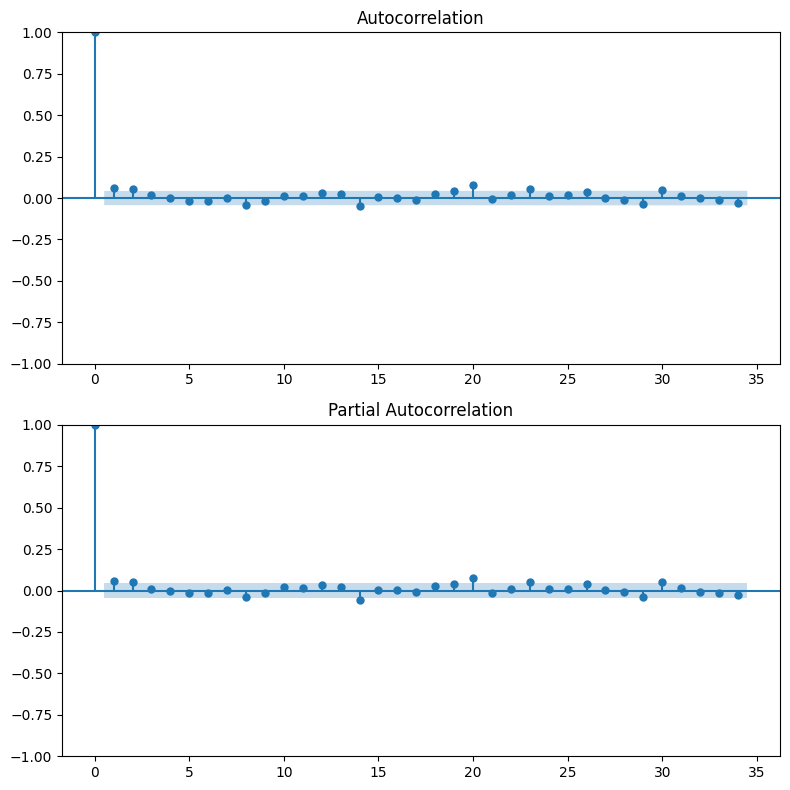

In [32]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Menampilkan Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[0])

# Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(daily_avg_trx['Average_Transaction_Amount'], ax=axs[1])

plt.tight_layout()
plt.show()


Menampilkan Plot PACF untuk lags dari 1 hingga 20

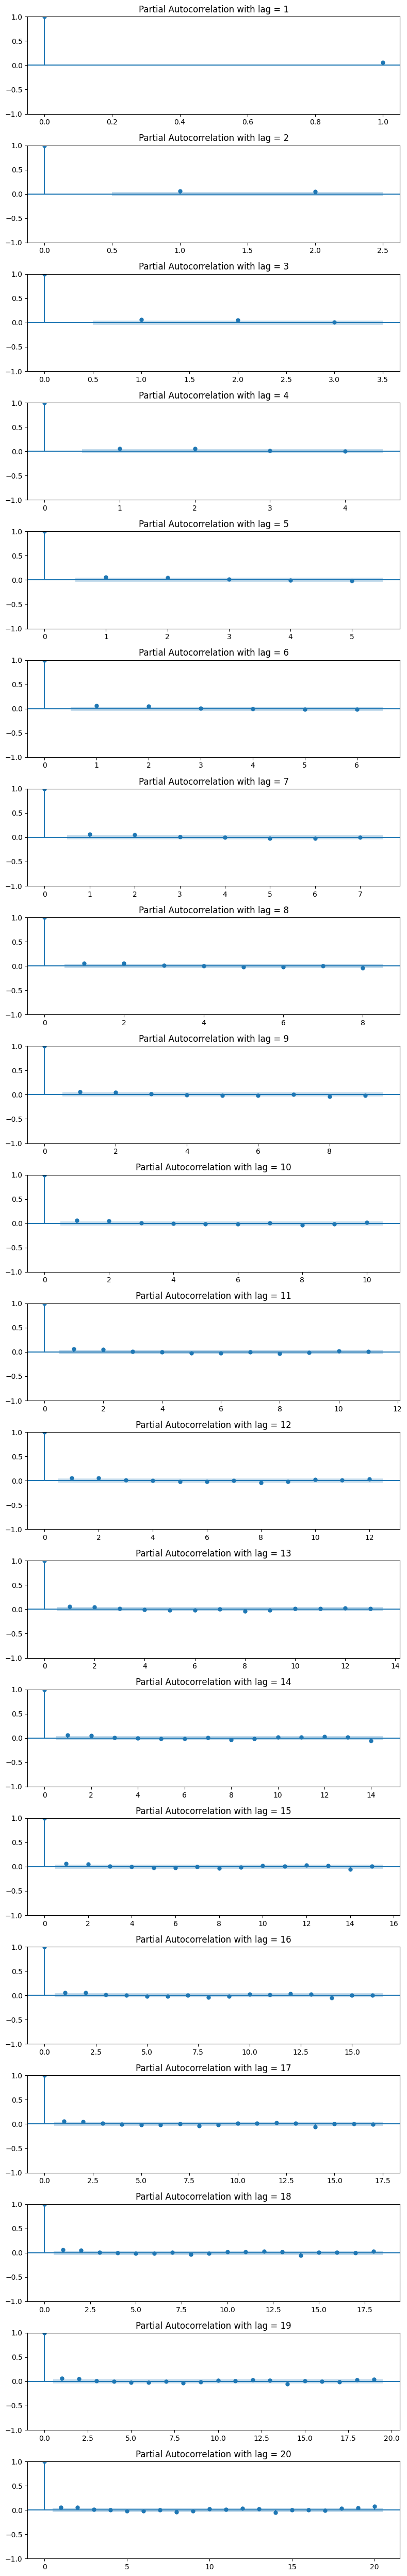

In [33]:
fig, axs = plt.subplots(20, 1, figsize=(8, 50))

# Menampilkan Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_pacf

# Plot dengan lags 1 hingga 20
for i, ax in enumerate(axs):
    plot_pacf(daily_avg_trx['Average_Transaction_Amount'], lags=i+1, ax=ax)
    ax.set_title('Partial Autocorrelation with lag = %d' % (i+1,))

plt.tight_layout()
plt.show()


Pemodelan dengan AutoRegression

In [34]:
# Pembagian dataset atas training dan testing
train_data = daily_avg_trx['Average_Transaction_Amount'][:len(daily_avg_trx)-10]
test_data = daily_avg_trx['Average_Transaction_Amount'][len(daily_avg_trx)-10:]

print('Ukuran data training:', train_data.shape)
print('Ukuran data testing :', test_data.shape)

# Model auto regression
from statsmodels.tsa.ar_model import AutoReg

# Fit data ke dalam model
ar_model = AutoReg(train_data, lags=10).fit()
print(ar_model.summary())


Ukuran data training: (2092,)
Ukuran data testing : (10,)
                                AutoReg Model Results                                 
Dep. Variable:     Average_Transaction_Amount   No. Observations:                 2092
Model:                            AutoReg(10)   Log Likelihood              -29552.004
Method:                       Conditional MLE   S.D. of innovations         353312.353
Date:                        Sat, 19 Jul 2025   AIC                          59128.009
Time:                                13:08:51   BIC                          59195.702
Sample:                                    10   HQIC                         59152.814
                                         2092                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.285e+06   8.91

Menguji Model Dengan Membuat Prediksi

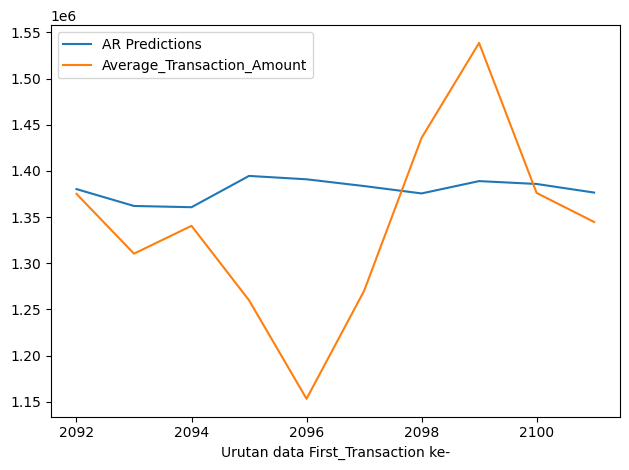

In [35]:
# Membuat prediksi dengan model
pred = ar_model.predict(
    start=len(train_data),
    end=(len(train_data) + len(test_data) - 1),
    dynamic=False
).rename('AR Predictions')

# Plot
import matplotlib.pyplot as plt

pred.plot(legend=True)
test_data.plot(legend=True)
plt.xlabel('Urutan data First_Transaction ke-')
plt.tight_layout()
plt.show()
